In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
%matplotlib inline

In [2]:
gdp_df=pd.read_csv("../Notebooks/UNdata1.csv", nrows=6729)

In [3]:
print(gdp_df)

     Country or Area  Year        Value  Value Footnotes
0        Afghanistan  2018  1734.723214              NaN
1        Afghanistan  2017  1758.465636              NaN
2        Afghanistan  2016  1757.023490              NaN
3        Afghanistan  2015  1766.593077              NaN
4        Afghanistan  2014  1795.735834              NaN
...              ...   ...          ...              ...
6724        Zimbabwe  1994  2768.309953              NaN
6725        Zimbabwe  1993  2572.870395              NaN
6726        Zimbabwe  1992  2591.007534              NaN
6727        Zimbabwe  1991  2906.272849              NaN
6728        Zimbabwe  1990  2819.549467              NaN

[6729 rows x 4 columns]


In [4]:
gdp_df = gdp_df.drop(labels="Value Footnotes", axis=1)

In [5]:
#gdp_df.columns = ["Country", "Year", "GDP_Per_Capita"]
gdp_df = gdp_df.rename(columns = {"Country or Area": "Country", "Value":"GDP_Per_Capita"} )
print(gdp_df)

          Country  Year  GDP_Per_Capita
0     Afghanistan  2018     1734.723214
1     Afghanistan  2017     1758.465636
2     Afghanistan  2016     1757.023490
3     Afghanistan  2015     1766.593077
4     Afghanistan  2014     1795.735834
...           ...   ...             ...
6724     Zimbabwe  1994     2768.309953
6725     Zimbabwe  1993     2572.870395
6726     Zimbabwe  1992     2591.007534
6727     Zimbabwe  1991     2906.272849
6728     Zimbabwe  1990     2819.549467

[6729 rows x 3 columns]


In [6]:
gdp_df = gdp_df.astype({"Country":"string"})

In [7]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6729 entries, 0 to 6728
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6729 non-null   string 
 1   Year            6729 non-null   int64  
 2   GDP_Per_Capita  6729 non-null   float64
dtypes: float64(1), int64(1), string(1)
memory usage: 157.8 KB


In [8]:
gdp_df["Country"].nunique() #Number of Unique Countries

243

In [9]:
gdp_df["Country"].value_counts(ascending=True).head(20)

Djibouti                      1
Turks and Caicos Islands      8
South Sudan                   8
Sint Maarten (Dutch part)     9
Nauru                        12
Afghanistan                  17
SÃ£o TomÃ© and Principe      18
CuraÃ§ao                     19
Qatar                        19
Other small states           19
Kosovo                       19
Liberia                      19
Palau                        19
Small states                 19
Timor-Leste                  19
Eritrea                      20
Libya                        20
Cayman Islands               20
San Marino                   21
Montenegro                   22
Name: Country, dtype: Int64

Countries with less governance, changes in governance, newly founded, or general transparency

In [10]:
gdp_2014=(gdp_df[gdp_df["Year"]==2014])
print(gdp_2014)

                  Country  Year  GDP_Per_Capita
4             Afghanistan  2014     1795.735834
21                Albania  2014    10700.993216
50                Algeria  2014    13557.769757
79                 Angola  2014     6813.052106
108   Antigua and Barbuda  2014    20440.540555
...                   ...   ...             ...
6592   West Bank and Gaza  2014     4445.307470
6617                World  2014    14514.392218
6646                Yemen  2014     3828.484887
6675               Zambia  2014     3684.685507
6704             Zimbabwe  2014     2506.490220

[240 rows x 3 columns]


In [11]:
gdp_2014.describe()

,Year,GDP_Per_Capita
count,240.0,240.000000
mean,2014.0,18034.303556
std,0.0,19320.930599
min,2014.0,672.681648
25%,2014.0,4301.187365
50%,2014.0,11868.067810
75%,2014.0,24388.408410
max,2014.0,130439.106674


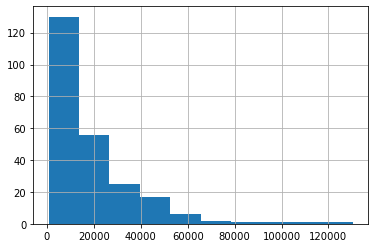

In [12]:
gdp_2014["GDP_Per_Capita"].hist()

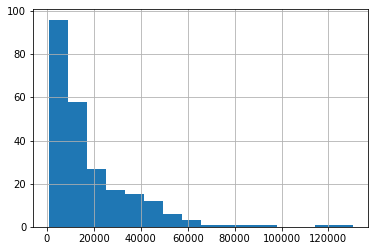

In [13]:
gdp_2014["GDP_Per_Capita"].hist(bins=16)

In [14]:
gdp_2014.sort_values("GDP_Per_Capita", ascending=False).head(5)

,Country,Year,GDP_Per_Capita
3639,"Macao SAR, China",2014,130439.106674
5003,Qatar,2014,116693.507701
3610,Luxembourg,2014,92349.186429
5316,Singapore,2014,81965.361071
707,Brunei,2014,76448.593329


In [15]:
gdp_2014.sort_values("GDP_Per_Capita").head(5)

,Country,Year,GDP_Per_Capita
1014,Central African Republic,2014,672.681648
794,Burundi,2014,768.469837
1375,Dem. Rep. Congo,2014,784.872656
4414,Niger,2014,900.136918
3697,Malawi,2014,1142.530804


In [16]:
gdp_df.pivot_table(values = "GDP_Per_Capita", index = "Country", columns = "Year")

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1502.354073,1671.581238,1626.764793,1772.764974,1807.762344,1795.735834,1766.593077,1757.023490,1758.465636,1734.723214
Albania,4458.247115,3229.250120,3015.391377,3323.864388,3622.007101,4129.975340,4533.894357,4064.132804,4450.922523,5056.566515,...,9525.377979,9927.638204,10207.752347,10369.561032,10492.669028,10700.993216,10970.321401,11352.101422,11796.719185,12316.071501
Algeria,10300.015042,9929.097717,9873.024864,9453.323181,9176.235569,9344.748909,9558.822868,9509.123393,9845.209222,10017.374034,...,12697.690780,12919.491054,13046.128511,13229.008711,13329.770758,13557.769757,13774.758920,13926.910489,13822.389087,13737.356063
Angola,4761.229638,4651.204299,4238.318419,3118.903488,3060.336207,3407.974524,3747.164004,3892.473420,3945.594930,3902.774196,...,6292.534856,6360.441938,6346.395122,6645.085625,6730.945822,6813.052106,6644.857255,6258.376628,6044.972035,5725.327238
Antigua and Barbuda,17454.549799,17598.378401,17497.380127,18055.500956,18851.937822,17645.173769,18407.710553,19000.281878,19486.171892,19816.291441,...,22568.626530,20555.414205,19876.215323,20283.897534,19918.131682,20440.540555,20994.725890,21923.796037,22400.379562,23840.729896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,NaN,NaN,NaN,NaN,3236.196368,3314.761163,3208.119899,3517.569954,3920.320010,4137.843864,...,3816.165070,4019.485067,4405.778573,4568.509070,4559.032259,4445.307470,4493.612080,4600.685400,4651.723645,4576.432497
World,8966.014072,8942.915645,8959.240204,8984.696890,9109.764275,9271.364990,9489.446042,9725.189314,9831.530107,10041.606392,...,12726.100963,13226.953625,13592.336383,13880.359252,14187.709075,14514.392218,14828.598884,15142.226499,15527.280228,15914.172172
Yemen,3425.707169,3466.039074,3561.740073,3519.550101,3581.814359,3628.620445,3660.350262,3729.732721,3839.688064,3873.781695,...,4359.812628,4566.157400,3876.302619,3861.116716,3938.891066,3828.484887,3108.764217,2619.050681,2404.422370,2284.970504


In [17]:
#gdp_pivoted
#print(gdp_df[(gdp_df["Year"] == 1990) | (gdp_df["Year"] ==2017)])

filteredGDP=gdp_df[(gdp_df["Year"] == 1990) | (gdp_df["Year"] ==2017)]
filteredGDP.shape

(449, 3)

In [18]:
pivotGDP = filteredGDP.pivot_table(values = "GDP_Per_Capita", index = "Country", columns = "Year")

In [19]:
pivotGDP = pivotGDP.dropna()
#filteredGDP.shape
#filteredGDP.isna()

In [20]:
print(pivotGDP)

Year                         1990          2017
Country                                        
Albania               4458.247115  11796.719185
Algeria              10300.015042  13822.389087
Angola                4761.229638   6044.972035
Antigua and Barbuda  17454.549799  22400.379562
Arab World           10491.507721  15542.746104
...                           ...           ...
Vietnam               1457.594613   6233.485045
World                 8966.014072  15527.280228
Yemen                 3425.707169   2404.422370
Zambia                2339.137959   3717.667166
Zimbabwe              2819.549467   2568.410072

[209 rows x 2 columns]


In [21]:
pivotGDP.isnull()

Year,1990,2017
Country,,
Albania,False,False
Algeria,False,False
Angola,False,False
Antigua and Barbuda,False,False
Arab World,False,False
...,...,...
Vietnam,False,False
World,False,False
Yemen,False,False


In [22]:
#Creates a column in the pivote table of GDP growth per capita from 1990 to 2017
pivotGDP['PercentChange'] = 100 * (pivotGDP[2017] - pivotGDP[1990]) / pivotGDP[1990]


#SCRAP CODE
#print(pivotGDP.head())
#pivotGDP.columns

In [23]:
#Number of countries with negative GDP growth from 1990 to 2017
print(str(pivotGDP[pivotGDP['PercentChange'] < 0]['PercentChange']
      .count()) + ' Countries have had negative per capita change in GDP from 1990 to 2017 and are liste below:')
print("\n")
      
#All countries with negative GDP growth from 1990 to 2017, sorted
print(pivotGDP[pivotGDP['PercentChange']<0].sort_values(by='PercentChange'))

20 Countries have had negative per capita change in GDP from 1990 to 2017 and are liste below:


Year                               1990          2017  PercentChange
Country                                                             
Dem. Rep. Congo             1386.933242    807.752905     -41.759785
United Arab Emirates      112349.597967  66477.818719     -40.829500
Burundi                     1027.396660    670.777072     -34.710993
Yemen                       3425.707169   2404.422370     -29.812379
Ukraine                    10463.959955   7906.540301     -24.440266
Central African Republic     982.659793    746.434942     -24.039332
Venezuela                  14619.454190  11489.648818     -21.408497
Tajikistan                  3661.340213   2923.673718     -20.147445
Haiti                       2061.842854   1653.001460     -19.828931
Gabon                      19556.665840  16144.935297     -17.445359
Madagascar                  1928.012284   1648.373871     -14.503975
Brunei

In [24]:
#DF combination of the two scrap code functions at the end of this cell
criteria_max_comb = pivotGDP.sort_values('PercentChange',ascending=False).iloc[0:2]
print(criteria_max_comb)
print("\n")
print("\n")


#DF selection of the country with the (1st) highest GDP per cap growth
criteria_max1 = pivotGDP[pivotGDP['PercentChange'] == pivotGDP['PercentChange'].max()]
print(criteria_max1)
print("\n")
print("\n")


#DF selection of the country with the 2nd highest GDP per cap growth
criteria_max2 = criteria_max_comb.iloc[1:2]
print(criteria_max2)

Year                      1990          2017  PercentChange
Country                                                    
Equatorial Guinea  1017.764136  22298.942144    2090.973464
China              1521.963868  15253.993071     902.257241




Year                      1990          2017  PercentChange
Country                                                    
Equatorial Guinea  1017.764136  22298.942144    2090.973464




Year            1990          2017  PercentChange
Country                                          
China    1521.963868  15253.993071     902.257241


In [25]:
#Add indices to each of the criteria DFs created from the pivot table so they are compatible with the original DF

criteria_max_comb = criteria_max_comb.reset_index()
criteria_max1 = criteria_max1.reset_index()
criteria_max2 = criteria_max2.reset_index()

#Convert DF type object to string

criteria_max1['Country'] = criteria_max1['Country'].astype('string')
criteria_max2['Country'] = criteria_max2['Country'].astype('string')
criteria_max_comb['Country'] = criteria_max_comb['Country'].astype('string')

#Code for Verification that conversion worked
#criteria_max1.info()
#criteria_max2.info()
#criteria_max_comb.info()

In [26]:
#criteria_max2.Country.values

In [27]:
gdp_df_max_comb = gdp_df[gdp_df['Country'].isin(criteria_max_comb.Country.values)]
gdp_df_max1 = gdp_df[gdp_df['Country'].isin(criteria_max1.Country.values)]
gdp_df_max2 = gdp_df[gdp_df['Country'].isin(criteria_max2.Country.values)]


#SCRAP CODE USED FOR SYNTAX TESTING
#gdp_df_top2 = gdp_df['Country'].isin(['China'])

In [28]:
#OLD CODE

#gdp_df_top2 = gdp_df[gdp_df['Country'].isin(['Equatorial Guinea', 'China'])]
print(gdp_df_max_comb.head())
print(gdp_df_max_comb.tail())

     Country  Year  GDP_Per_Capita
1126   China  2018    16181.777716
1127   China  2017    15253.993071
1128   China  2016    14368.630801
1129   China  2015    13534.846237
1130   China  2014    12725.089099
                Country  Year  GDP_Per_Capita
1715  Equatorial Guinea  1994     1538.475957
1716  Equatorial Guinea  1993     1365.588482
1717  Equatorial Guinea  1992     1272.159060
1718  Equatorial Guinea  1991      975.558189
1719  Equatorial Guinea  1990     1017.764136


In [29]:
#1990 - 2017, EQ and China, 3 plots, gdp_df

#gdp_df[gdp_df['Country']=='Equatorial Guinea'].plot(x='Year',y='GDP_Per_Capita',kind='line',title='GDP Per Capita',label='Equatorial Guinea') #criteria_max1

#gdp_df.plot(x='Year', y='GDP_Per_Capita', kind='line', title="Equatorial Guinea")

In [30]:
#Creates Titles/Labels for 1st and 2nd placed countries

max1_lab = criteria_max1.iloc[0,0]
max2_lab = criteria_max2.iloc[0,0]

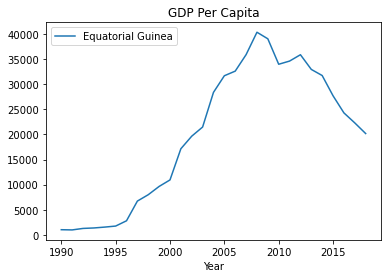

In [31]:
gdp_df_max1.plot(
    x = 'Year',
    y = 'GDP_Per_Capita',
    kind = 'line',
    title = 'GDP Per Capita', 
    label = max1_lab)

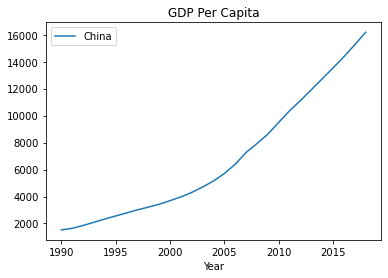

In [32]:
gdp_df[gdp_df['Country']=='China'].plot(
    x='Year', 
    y='GDP_Per_Capita',
    kind='line',
    title='GDP Per Capita',
    label = max2_lab)

Text(0, 0.5, 'USD')

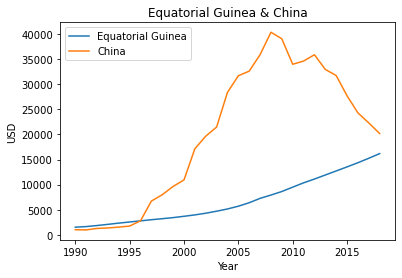

In [33]:
fig, ax = plt.subplots()

gdp_df_max_comb.groupby('Country').plot(
    ax = ax, 
    x = 'Year', 
    y = 'GDP_Per_Capita', 
    kind = 'line', 
    title = max1_lab + " & " + max2_lab)

plt.legend(labels=[max1_lab, max2_lab])
plt.xlabel('Year')
plt.ylabel('USD')

#TEST CODE
#plt.legend(labels=['TEMP1','TEMP2'])

In [34]:
continents=pd.read_csv("../Data/continents.csv")
print(continents.head())

  Continent      Country
0      Asia  Afghanistan
1    Europe      Albania
2    Africa      Algeria
3    Europe      Andorra
4    Africa       Angola


In [35]:
gdp_df2 = gdp_df.merge(continents, on='Country')
print(gdp_df2)

          Country  Year  GDP_Per_Capita Continent
0     Afghanistan  2018     1734.723214      Asia
1     Afghanistan  2017     1758.465636      Asia
2     Afghanistan  2016     1757.023490      Asia
3     Afghanistan  2015     1766.593077      Asia
4     Afghanistan  2014     1795.735834      Asia
...           ...   ...             ...       ...
5329     Zimbabwe  1994     2768.309953    Africa
5330     Zimbabwe  1993     2572.870395    Africa
5331     Zimbabwe  1992     2591.007534    Africa
5332     Zimbabwe  1991     2906.272849    Africa
5333     Zimbabwe  1990     2819.549467    Africa

[5334 rows x 4 columns]


In [36]:
gdp_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5334 entries, 0 to 5333
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         5334 non-null   object 
 1   Year            5334 non-null   int64  
 2   GDP_Per_Capita  5334 non-null   float64
 3   Continent       5334 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 208.4+ KB


In [37]:
gdp_df2.nunique()

Country            192
Year                29
GDP_Per_Capita    5334
Continent            6
dtype: int64

In [38]:
gdp_df2.groupby('Continent')['Country'].nunique()

Continent
Africa           51
Asia             44
Europe           45
North America    26
Oceania          14
South America    12
Name: Country, dtype: int64

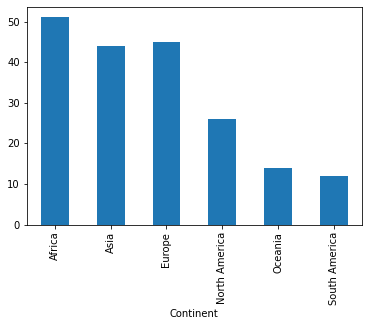

In [39]:
gdp_df2.groupby('Continent')['Country'].nunique().plot(kind = 'bar')

In [40]:
#Multi-step PROC - Works

#gdp_df2_2014 = gdp_df2[gdp_df2['Year'] == 2014]
#sns.boxplot(data = gdp_df2_2014, x = 'Continent', y = 'GDP_Per_Capita')

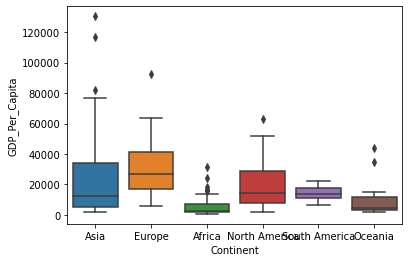

In [41]:
#Implemented PROC

sns.boxplot(data = gdp_df2[gdp_df2['Year'] == 2014], x = 'Continent', y = 'GDP_Per_Capita')

#Question #21, What do you notice? 
#Quick comparison of median GDP per capita shows expected variations
#Quick comparison of IQR Q2 and Q3 range shows that Africa and SA have far less variation than Asia or Europe

In [42]:
internet_df = pd.read_csv('../Notebooks/UNdata2.csv', nrows=4495)
#pint(internet_df)

In [43]:
internet_df = internet_df.drop(columns = ['Value Footnotes'])
#print(internet_df)

In [44]:
internet_df = internet_df.rename(columns = {'Country or Area':'Country', 'Year':'Year', 'Value':'Internet_Users_Pct'})
print(internet_df)

#internet_df.columns
#internet_df.info
#internet_df.info()
#type(internet_df)

internet_df[internet_df['Internet_Users_Pct'] > 0]['Year'].min()

          Country  Year  Internet_Users_Pct
0     Afghanistan  2014            6.390000
1     Afghanistan  2013            5.900000
2     Afghanistan  2012            5.454545
3     Afghanistan  2011            5.000000
4     Afghanistan  2010            4.000000
...           ...   ...                 ...
4490     Zimbabwe  1997            0.033080
4491     Zimbabwe  1996            0.016790
4492     Zimbabwe  1995            0.007684
4493     Zimbabwe  1994            0.001739
4494     Zimbabwe  1990            0.000000

[4495 rows x 3 columns]


1990

In [45]:
#internet_sorted = internet_df[internet_df['Internet_Users_Pct'] > 0]
#internet_sorted.sort_values(by = 'Year').head(10)

In [46]:
gdp_and_internet_use = gdp_df.merge(internet_df, on = ['Country', 'Year'],)
#print(gdp_and_internet_use)

#gdp_and_internet_use.head()
gdp_and_internet_use.tail()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3514,Zimbabwe,1997,3036.422224,0.033080
3515,Zimbabwe,1996,2985.856605,0.016790
3516,Zimbabwe,1995,2736.486436,0.007684
3517,Zimbabwe,1994,2768.309953,0.001739
3518,Zimbabwe,1990,2819.549467,0.000000


In [47]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year']==2014]
#print(gdp_and_internet_use_2014)

#gdp_and_internet_use_2014.mean()
gdp_and_internet_use_2014['Internet_Users_Pct'].mean()

44.673536463414635

In [48]:
print(gdp_and_internet_use_2014[gdp_and_internet_use_2014['Internet_Users_Pct'] >= 90]['Country'].count())

print("\n")

print(gdp_and_internet_use_2014[gdp_and_internet_use_2014['Internet_Users_Pct'] >= 90])

12


                   Country  Year  GDP_Per_Capita  Internet_Users_Pct
228                Bahrain  2014    43846.568554            90.99998
854                Denmark  2014    45057.083449            95.99000
1067               Finland  2014    39301.058763            92.38000
1395               Iceland  2014    42774.888849            98.16000
1578                 Japan  2014    37337.317406            90.58000
1812            Luxembourg  2014    92349.186429            94.67000
2199           Netherlands  2014    46238.209707            93.17000
2310                Norway  2014    63328.259526            96.30000
2556                 Qatar  2014   116693.507701            91.49000
2992                Sweden  2014    44762.490296            92.52000
3297  United Arab Emirates  2014    62879.703021            90.40000
3318        United Kingdom  2014    38693.893263            91.61000


In [49]:
#print(gdp_and_internet_use_2014.sort_values('GDP_Per_Capita', ascending=False).head(3))

top3 = gdp_and_internet_use_2014.sort_values('GDP_Per_Capita', ascending=False).iloc[0:3]
#print(top3)

gdp_and_internet_use_top3 = gdp_and_internet_use[gdp_and_internet_use['Country'].
                                                 isin(top3.Country.values)]
print(gdp_and_internet_use_top3)

         Country  Year  GDP_Per_Capita  Internet_Users_Pct
1812  Luxembourg  2014    92349.186429           94.670000
1813  Luxembourg  2013    90656.380431           93.776500
1814  Luxembourg  2012    89505.159080           91.949924
1815  Luxembourg  2011    92005.016836           90.029859
1816  Luxembourg  2010    91743.293852           90.620000
...          ...   ...             ...                 ...
2785   Singapore  1994    43835.783293            1.185204
2786   Singapore  1993    40714.217145            0.763278
2787   Singapore  1992    37463.009189            0.471368
2788   Singapore  1991    36201.887548            0.161504
2789   Singapore  1990    34911.740001            0.000000

[64 rows x 4 columns]


In [50]:
gdp_and_internet_use_top3.info()
#type(gdp_and_internet_use_top3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 1812 to 2789
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             64 non-null     object 
 1   Year                64 non-null     int64  
 2   GDP_Per_Capita      64 non-null     float64
 3   Internet_Users_Pct  64 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.5+ KB


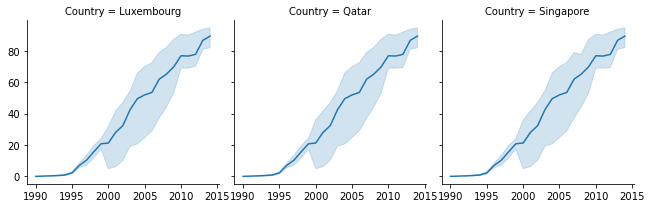

In [51]:
#I know this isn't how it's supposed to display, but I can't find any good documentation or
#discussions on why this isn't self selecting the data. I know I could just create 3 data frames, but
#I believe that defeats the point. Every piece of documentation I look at shows examples working 
#with code like I have it below, but sorting it out properly. 

#sns.lineplot(x = 'Year', y = 'Internet_Users_Pct', data = gdp_and_internet_use_top3)

plottemp = sns.FacetGrid(gdp_and_internet_use_top3, col = 'Country')
plottemp.map(sns.lineplot, x = 'Year', y = 'Internet_Users_Pct', data = gdp_and_internet_use_top3)

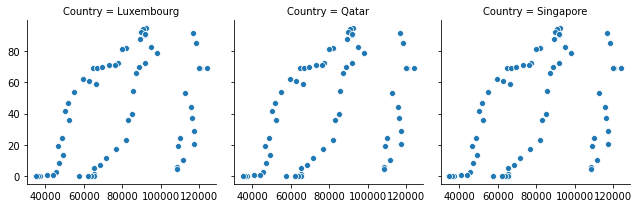

In [52]:
#Same as above. 

plottemp = sns.FacetGrid(gdp_and_internet_use_top3, col = 'Country')
plottemp.map(sns.scatterplot, x = 'GDP_Per_Capita', y = 'Internet_Users_Pct', data = gdp_and_internet_use_top3)

In [53]:
#78.80 Percent of the variability within the data, can be explained by the relationship between GDP
#per capita and percent of users having access to the internet (I assume the variable is "Access"). 

gdp_and_internet_use_2014['GDP_Per_Capita'].corr(gdp_and_internet_use_2014['Internet_Users_Pct'])

0.7879885707262837

In [54]:
#For comparison before and after due to the copy warning
gdp_and_internet_use_2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 0 to 3497
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             164 non-null    object 
 1   Year                164 non-null    int64  
 2   GDP_Per_Capita      164 non-null    float64
 3   Internet_Users_Pct  164 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 6.4+ KB


In [55]:
gdp_and_internet_use_2014['GDP_Log'] = np.log(gdp_and_internet_use_2014['GDP_Per_Capita'])

print(gdp_and_internet_use_2014)
#gdp_and_internet_use_2014.info()

                  Country  Year  GDP_Per_Capita  Internet_Users_Pct   GDP_Log
0             Afghanistan  2014     1795.735834                6.39  7.493170
13                Albania  2014    10700.993216               60.10  9.278092
34                Algeria  2014    13557.769757               18.09  9.514715
56                 Angola  2014     6813.052106               21.26  8.826595
76    Antigua and Barbuda  2014    20440.540555               64.00  9.925275
...                   ...   ...             ...                 ...       ...
3411              Vanuatu  2014     2837.122659               18.80  7.950546
3431            Venezuela  2014    17131.386907               57.00  9.748668
3455                Yemen  2014     3828.484887               22.55  8.250224
3475               Zambia  2014     3684.685507               17.34  8.211940
3497             Zimbabwe  2014     2506.490220               19.89  7.826639

[164 rows x 5 columns]


<ipython-input-55-918a258a526f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_and_internet_use_2014['GDP_Log'] = np.log(gdp_and_internet_use_2014['GDP_Per_Capita'])


In [56]:
#Test of log function, math checks out, no null values created, same number of observations as before
#the calculation, looks good to me!

print(np.log(1795.735834))
gdp_and_internet_use_2014.info()

7.493170152297873
<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 0 to 3497
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             164 non-null    object 
 1   Year                164 non-null    int64  
 2   GDP_Per_Capita      164 non-null    float64
 3   Internet_Users_Pct  164 non-null    float64
 4   GDP_Log             164 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 7.7+ KB


In [68]:
gdp_and_internet_use_2014['GDP_Log'].corr(gdp_and_internet_use_2014['Internet_Users_Pct'])

#New correlation using a log function shows a higher R^^2 value, unsure of what this means, instinct
#thinks this may have something to do with what I would expect to be a lag time relationship between
#the interactions of GDP per capita and internet users percentage. 

0.8844322971419837

In [76]:
#What is the label for USA? 

gdp_and_internet_use.groupby('Country')['Year'].nunique().tail(10)

Country
United Arab Emirates    21
United Kingdom          25
United States           25
Uruguay                 22
Uzbekistan              21
Vanuatu                 20
Venezuela               24
Yemen                   20
Zambia                  22
Zimbabwe                22
Name: Year, dtype: int64

In [77]:
#Create new df of only the USA

gdp_USA = gdp_and_internet_use[gdp_and_internet_use['Country']=='United States']

In [79]:
#print(gdp_USA)

gdp_USA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 3343 to 3367
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             25 non-null     object 
 1   Year                25 non-null     int64  
 2   GDP_Per_Capita      25 non-null     float64
 3   Internet_Users_Pct  25 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1000.0+ bytes


In [81]:
gdp_USA['GDP_Per_Capita'].corr(gdp_USA['Internet_Users_Pct'])

#Yes, it is useful depending on what one is trying to learn form the data. Although the correlation
#is extremely strong, I would argue in favor of some sort of oultlier status. As in all things stats
#context is key. The USA being the largest tech inovator for internet related technologies probably
#has something to do with them having a stronger correlation. 

0.9916180229578647

git commit -m 'MESSAGE'
git push origin master
